In [48]:
import glob
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import mdshare
#import pyemma
from tqdm.notebook import tqdm
from matplotlib import rc
from scipy.ndimage import gaussian_filter

In [49]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 14})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

nn=np.linspace(-1,3)

In [158]:
data = np.loadtxt('data.txt')
data = data.T
ndim = data[0].astype(int)

In [159]:
ndim

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

### 1D RC histogram

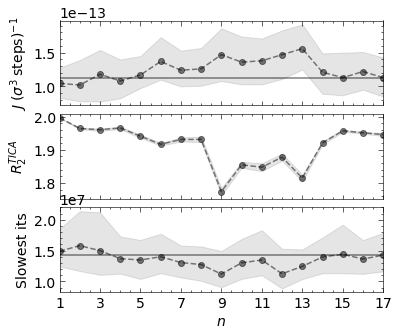

In [169]:

from matplotlib import gridspec

fig = plt.figure(figsize=(5.8,5))
# set height ratios for subplots
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1]) 


# Monodimensional CVs (n=1)
ax0 = plt.subplot(gs[0])
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_xlim([1,17])
ax0.set_xticks(range(1,18,2))
ax0.set_ylabel(r'$J \;(\sigma^3 \; \mathrm{steps})^{-1}$')
#ax0.bar(data[0],data[3], yerr=data[4], color='black', alpha=0.5)
ax0.plot(ndim,data[9],'ko--', alpha=0.5)
ax0.plot(ndim,np.full_like(data[9],data[9][-1]),'-', color='black', alpha=0.5)
ax0.fill_between(ndim, data[10], data[11], color='black', alpha=0.1)

ax1 = plt.subplot(gs[1], sharex = ax0)
plt.setp(ax1.get_xticklabels(), visible=False)
#ax1.set_ylim([0,17])
ax1.set_ylabel(r'$R_2^{TICA}$')
#ax1.set_xlabel(r'$n$')
ax1.plot(data[0],data[3],'ko--', alpha=0.5)
ax1.fill_between(data[0], data[3]-data[4], data[3]+data[4], color='black', alpha=0.1)
#ax1.plot(data[0],np.full_like(data[3],data[3][-1]),'-', color='black', alpha=0.5)
#ax1.plot(CVcat,CVfreq[rank_ints.reshape(numCVs)], 'ko')

ax2 = plt.subplot(gs[2], sharex = ax0)
plt.setp(ax1.get_xticklabels(), visible=True)
#ax1.set_ylim([0,17])
ax2.set_ylabel(r'Slowest its')
ax2.set_xlabel(r'$n$')
ax2.plot(ndim,data[5],'ko--', alpha=0.5)
ax2.plot(ndim,np.full_like(data[5],data[5][-1]),'-', color='black', alpha=0.5)
ax2.fill_between(ndim, data[6], data[7], color='black', alpha=0.1)
#ax2.set_xticks(range(1,13))

plt.xticks(rotation = 0) 
plt.subplots_adjust(hspace=.1)

plt.savefig('./rate-vamp.png', dpi=300, bbox_inches='tight')
plt.show()

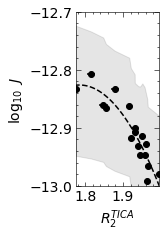

In [167]:
plt.figure(figsize=(1.5,3.2))
plt.plot(data[3],np.log10(data[9]),'ko')
plt.xlabel(r'$R_2^{TICA}$')
plt.ylabel('$\log_{10} \; \; J$')

plt.errorbar(data[3],np.log10(data[9]), xerr=data[4], color='black', linestyle='')

r2_sort = np.argsort(data[3])

fit = np.loadtxt('poly_fit')

ylow = np.log10(data[10][r2_sort])
yhigh = np.log10(data[11][r2_sort])

from scipy.signal import savgol_filter
ylow = savgol_filter(ylow, 11, 2)
yhigh = savgol_filter(yhigh, 11, 2)

plt.fill_between(data[3][r2_sort], ylow, yhigh, color='black', alpha=0.1)


plt.plot(fit.T[0],fit.T[1], 'k--')
plt.xlim(np.min(data[3]),np.amax(data[3]))
plt.ylim(-13,-12.7)
plt.savefig('./J-R2.png', dpi=300, bbox_inches='tight')